In [26]:
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df_ss2 = pd.read_parquet("/scratch/PI/horence/JuliaO/single_cell/SZS_pipeline2/data/HLCA_smartseq_P2_with_postprocessing.pq",columns = ["juncPosR1A","juncPosR1B","chrR1A"])

In [33]:
df_10x = pd.read_parquet("/scratch/PI/horence/JuliaO/single_cell/SZS_pipeline2/data/HLCA4_P2_10x_with_postprocessing_lung.pq",columns = ["juncPosR1A","juncPosR1B","chrR1A"])

In [32]:
df_ss2["junc"] = df_ss2["chrR1A"] + "_" + df_ss2["juncPosR1A"].astype(str) + "_"  + df_ss2["juncPosR1B"].astype(str)

In [40]:
df_ss2.shape[0]

28906375

In [42]:
df_ss2.shape[0]

38145051

In [34]:
df_10x["junc"] = df_10x["chrR1A"] + "_" + df_10x["juncPosR1A"].astype(str) + "_"  + df_10x["juncPosR1B"].astype(str)

In [36]:
len(set(df_ss2["junc"]).intersection(set(df_10x["junc"])))

360731

In [37]:
len(set(df_ss2["junc"]))

360731

In [39]:
len(set(df_10x["junc"]))

2828355

In [15]:
in_path = "/scratch/PI/horence/JuliaO/single_cell/SZS_pipeline2/scripts/output/rijk_zscore/"
datanames = ["HLCA4_P2_10x_with_postprocessing_lung","HLCA4_P3_10x_with_postprocessing_lung"]
dfs = []

z_cols = ["scZ","svd_z0","svd_z1","svd_z2"]
sig_genes = []
for dataname in datanames:
  print(dataname)
  df = pd.read_parquet("{}{}_sym_SVD_normdonor_S_0.1_z_0.0_b_5.pq".format(in_path, dataname),columns=["ontology","geneR1A_uniq","scZ","svd_z0","svd_z1","svd_z2","cell_gene"])
  sig = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/SZS_pipeline2/scripts/output/variance_adjusted_permutations/{}_pvals_100_S_0.1_z_0.0_b_5.tsv".format(dataname),sep="\t")
  sig_genes.append(set(sig[sig["perm_pval_adj_scZ"] < 0.05]["geneR1A_uniq"].unique()))
  df = df.drop_duplicates("cell_gene")
  df["ontology_gene"] = df["ontology"] + df["geneR1A_uniq"]
  df["num_ont_gene"] = df["ontology_gene"].map(df.groupby("ontology_gene")["cell_gene"].nunique())
  df = df[df["num_ont_gene"] > 10]
  for z_col in z_cols:
    df["median_" + z_col] = df["ontology_gene"].map(df.groupby("ontology_gene")[z_col].median())
  df.drop_duplicates("ontology_gene")
  dfs.append(df)

HLCA4_P2_10x_with_postprocessing_lung
HLCA4_P3_10x_with_postprocessing_lung


In [16]:
both_sig = set.intersection(*sig_genes)

In [20]:
merged

,ontology_P2,geneR1A_uniq_P2,scZ_P2,svd_z0_P2,svd_z1_P2,svd_z2_P2,cell_gene_P2,ontology_gene,num_ont_gene_P2,median_scZ_P2,...,scZ_P3,svd_z0_P3,svd_z1_P3,svd_z2_P3,cell_gene_P3,num_ont_gene_P3,median_scZ_P3,median_svd_z0_P3,median_svd_z1_P3,median_svd_z2_P3
0,lungimmuneMacrophage,ACTR1A,-0.467562,1.892936,-6.216180e-04,-2.489396e-01,P2_3_S3_L00_CTCACACCAAACCTACACTR1A,lungimmuneMacrophageACTR1A,142,0.163156,...,0.879221,-1.437147,2.439339e+00,6.393296e-01,P3_5_S13_L00_CTGATCCAGTCCCACGACTR1A,118,0.089558,-0.098259,6.383005e-02,2.326071e-02
1,lungendothelialVein,ADIRF,-0.362671,-1.309791,1.902227e-01,-1.926817e-02,P2_3_S3_L00_AAATGCCCATCAGTACADIRF,lungendothelialVeinADIRF,369,-0.189338,...,-0.146826,-1.356270,-1.486732e-01,-1.469909e-02,P3_6_S14_L00_GCGCCAAAGCTAACAAADIRF,62,-0.154822,-1.356270,-1.486732e-01,-1.469909e-02
2,lungstromalAirway Smooth Muscle,ADIRF,-0.211005,-1.309791,1.902227e-01,-1.926817e-02,P2_3_S3_L00_CAGATCAAGTCAAGCGADIRF,lungstromalAirway Smooth MuscleADIRF,141,-0.205096,...,0.023747,-1.356270,-1.486732e-01,-1.469909e-02,P3_6_S14_L00_TGCTACCAGTCGCCGTADIRF,307,-0.050879,-1.356270,-1.486732e-01,-1.469909e-02
3,lungendothelialCapillary Aerocyte,ADIRF,-0.254338,-1.309791,1.902227e-01,-1.926817e-02,P2_3_S3_L00_TCAGCTCTCGCCTGAGADIRF,lungendothelialCapillary AerocyteADIRF,2154,-0.174266,...,-0.050879,-1.356270,-1.486732e-01,-1.469909e-02,P3_6_S14_L00_GACAGAGGTCGGATCCADIRF,429,-0.146826,-1.356270,-1.486732e-01,-1.469909e-02
4,lungepithelialAlveolar Epithelial Type 1,ADIRF,-0.081433,-1.232694,9.285193e-03,-1.770114e-02,P2_3_S3_L00_CATGCCTTCCTGCCATADIRF,lungepithelialAlveolar Epithelial Type 1ADIRF,177,-0.200172,...,-0.218786,-1.356270,-1.486732e-01,-1.469909e-02,P3_6_S14_L00_GAATGAAAGTCCCACGADIRF,285,-0.218786,-1.356270,-1.486732e-01,-1.469909e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,lungepithelialBasal,EIF3H,0.029531,-0.026958,9.676229e-17,-5.711840e-21,P2_8_S8_L00_AACTCTTCAAGCTGAGEIF3H,lungepithelialBasalEIF3H,42,0.029531,...,-0.129602,-1.749387,-1.501922e-01,5.255780e-02,P3_2_S10_L00_TCGAGGCAGCGTGAACEIF3H,21,-0.081222,-1.741948,-1.599232e-01,-2.507740e-02
6669,lungepithelialClub,EIF3H,0.029531,-0.026958,9.676229e-17,-5.711840e-21,P2_7_S7_L00_CTACACCTCGCGTTTCEIF3H,lungepithelialClubEIF3H,12,0.029531,...,-0.470550,-1.749387,-1.501922e-01,5.255780e-02,P3_2_S10_L00_GTGTGCGTCAGTCAGTEIF3H,22,-0.066611,-1.741948,-1.599232e-01,-2.507740e-02
6670,lungimmuneProliferating Macrophage,FABP5,-0.015323,-0.013416,-2.799732e-03,5.981068e-17,P2_3_S3_L00_CCTAGCTAGCTAACAAFABP5,lungimmuneProliferating MacrophageFABP5,57,-0.015323,...,0.002698,-0.002413,-6.016943e-05,3.650332e-18,P3_6_S14_L00_GGCTCGAAGACTGGGTFABP5,38,0.002698,-0.002413,-6.016943e-05,3.650332e-18
6671,lungepithelialAlveolar Epithelial Type 2,FABP5,-0.015323,-0.013416,-2.799732e-03,5.981068e-17,P2_8_S8_L00_GCAGTTATCATTGCCCFABP5,lungepithelialAlveolar Epithelial Type 2FABP5,102,-0.015323,...,0.002698,-0.002413,-6.016943e-05,3.650332e-18,P3_6_S14_L00_CGTCCATAGTCGATAAFABP5,297,0.002698,-0.002413,-6.016943e-05,3.650332e-18


In [18]:
for i in range(len(dfs)):
  dfs[i] = dfs[i].drop_duplicates("ontology_gene")

In [19]:
merged = dfs[0].merge(dfs[1],on="ontology_gene",suffixes=["_P2","_P3"])

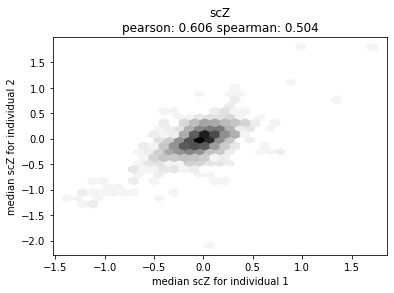

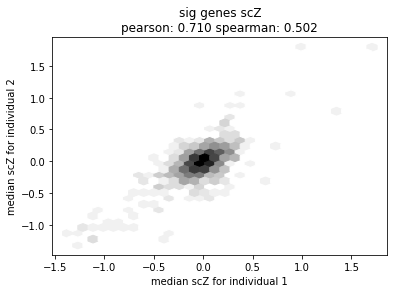

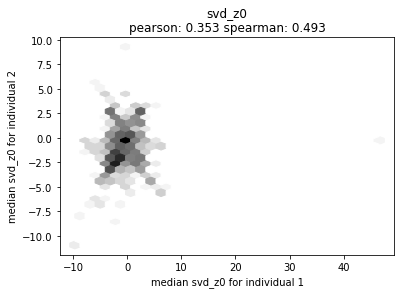

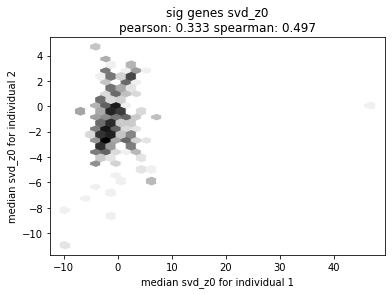

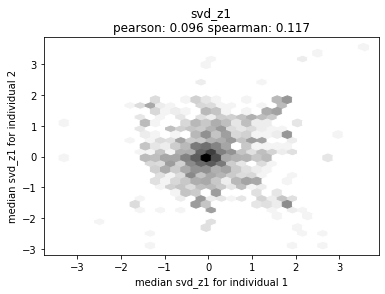

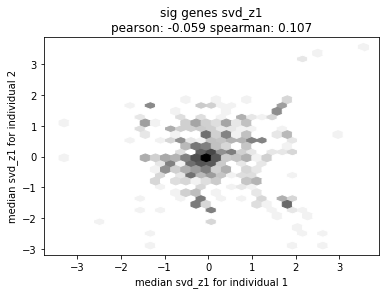

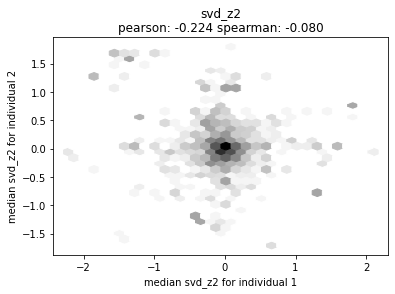

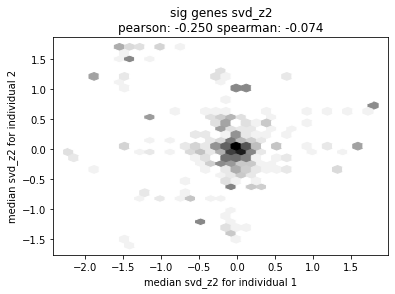

In [21]:

for z_col in z_cols:
#   plt.plot(merged["median_{}_P2".format(z_col)],merged["median_{}_P3".format(z_col)],linestyle="",marker="o",alpha = 0.4)
  plt.hexbin(merged["median_{}_P2".format(z_col)],merged["median_{}_P3".format(z_col)],gridsize=30,cmap="Greys",bins="log")

  plt.title("{}\npearson: {:.3f} spearman: {:.3f}".format(z_col,merged["median_{}_P2".format(z_col)].corr(merged["median_{}_P3".format(z_col)],method="pearson"),merged["median_{}_P2".format(z_col)].corr(merged["median_{}_P3".format(z_col)],method="spearman")))
  plt.xlabel("median {} for individual 1".format(z_col))
  plt.ylabel("median {} for individual 2".format(z_col))
  plt.show()
  
  sub_df = merged[merged["geneR1A_uniq_P2"].isin(both_sig)]
  
  plt.hexbin(sub_df["median_{}_P2".format(z_col)],sub_df["median_{}_P3".format(z_col)],gridsize=30,cmap="Greys",bins="log")

  plt.title("sig genes {}\npearson: {:.3f} spearman: {:.3f}".format(z_col,sub_df["median_{}_P2".format(z_col)].corr(sub_df["median_{}_P3".format(z_col)],method="pearson"),sub_df["median_{}_P2".format(z_col)].corr(sub_df["median_{}_P3".format(z_col)],method="spearman")))
  plt.xlabel("median {} for individual 1".format(z_col))
  plt.ylabel("median {} for individual 2".format(z_col))
  plt.show()
  

HLCA4_P2_10x_with_postprocessing_lung
HLCA_smartseq_P2_with_postprocessing_shared


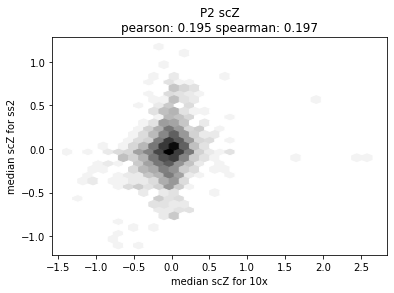

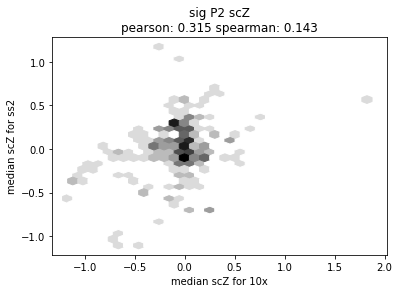

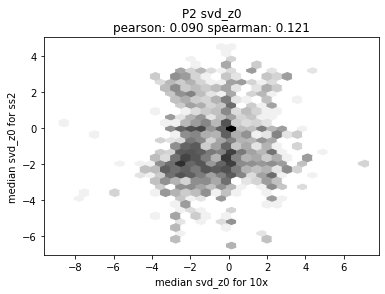

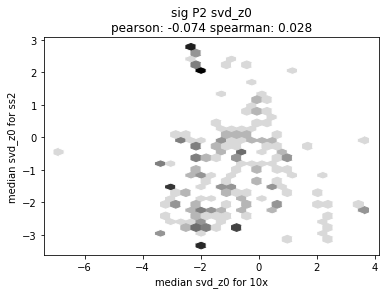

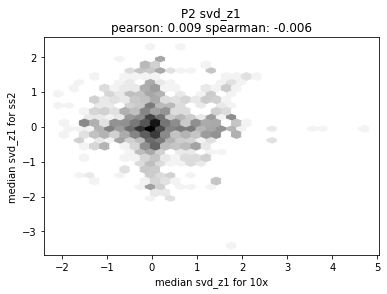

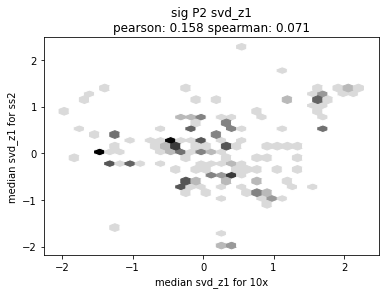

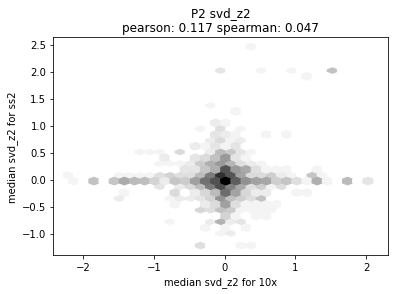

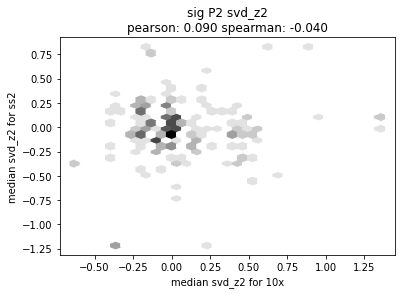

HLCA4_P3_10x_with_postprocessing_lung
HLCA_smartseq_P3_with_postprocessing_shared


In [ ]:
for ind in ["P2","P3"]:
  dfs = []
  sig_genes = []
  datanames = ["HLCA4_{}_10x_with_postprocessing_lung".format(ind),"HLCA_smartseq_{}_with_postprocessing_shared".format(ind)]
  for dataname in datanames:
    print(dataname)
    df = pd.read_parquet("{}{}_sym_SVD_normdonor_S_0.1_z_0.0_b_5.pq".format(in_path, dataname),columns=["ontology","geneR1A_uniq","scZ","svd_z0","svd_z1","svd_z2","cell_gene"])
    sig = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/SZS_pipeline2/scripts/output/variance_adjusted_permutations/{}_pvals_100_S_0.1_z_0.0_b_5.tsv".format(dataname),sep="\t")
    sig_genes.append(set(sig[sig["perm_pval_adj_scZ"] < 0.05]["geneR1A_uniq"].unique()))
    df = df.drop_duplicates("cell_gene")
    df["ontology_gene"] = df["ontology"] + df["geneR1A_uniq"]
    df["num_ont_gene"] = df["ontology_gene"].map(df.groupby("ontology_gene")["cell_gene"].nunique())
    df = df[df["num_ont_gene"] > 10]
    for z_col in z_cols:
      df["median_" + z_col] = df["ontology_gene"].map(df.groupby("ontology_gene")[z_col].median())
    df.drop_duplicates("ontology_gene")
    dfs.append(df)
  for i in range(len(dfs)):
    dfs[i] = dfs[i].drop_duplicates("ontology_gene")
  merged = dfs[0].merge(dfs[1],on="ontology_gene",suffixes=["_10x","_ss2"])
  both_sig = set.intersection(*sig_genes)
  for z_col in z_cols:
  #   plt.plot(merged["median_{}_P2".format(z_col)],merged["median_{}_P3".format(z_col)],linestyle="",marker="o",alpha = 0.4)
    plt.hexbin(merged["median_{}_10x".format(z_col)],merged["median_{}_ss2".format(z_col)],gridsize=30,cmap="Greys",bins="log")

    plt.title("{} {}\npearson: {:.3f} spearman: {:.3f}".format(ind,z_col,merged["median_{}_10x".format(z_col)].corr(merged["median_{}_ss2".format(z_col)],method="pearson"),merged["median_{}_10x".format(z_col)].corr(merged["median_{}_ss2".format(z_col)],method="spearman")))
    plt.xlabel("median {} for 10x".format(z_col))
    plt.ylabel("median {} for ss2".format(z_col))
    plt.show()
    sub_df = merged[merged["geneR1A_uniq_10x"].isin(both_sig)]
    plt.hexbin(sub_df["median_{}_10x".format(z_col)],sub_df["median_{}_ss2".format(z_col)],gridsize=30,cmap="Greys",bins="log")

    plt.title("sig {} {}\npearson: {:.3f} spearman: {:.3f}".format(ind,z_col,sub_df["median_{}_10x".format(z_col)].corr(sub_df["median_{}_ss2".format(z_col)],method="pearson"),sub_df["median_{}_10x".format(z_col)].corr(sub_df["median_{}_ss2".format(z_col)],method="spearman")))
    plt.xlabel("median {} for 10x".format(z_col))
    plt.ylabel("median {} for ss2".format(z_col))
    plt.show()